# Model comparisons - 03 McKenzie and Bickle (1988)
This notebook compares the calculation results from pyMelt to the figures published in the McKenzie and Bickle (1988) manuscript.

Import required packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyMelt as m

Faffing around with some numpy arrays...

In [2]:
mckenzie = m.lithologies.mckenzie.lherzolite()#DeltaS=250)
T = np.linspace(1100, 2100, 501)
mckenzie_F = [mckenzie.F(3.0, i) for i in T]
P = np.linspace(0.0, 9.0, 91)
mckenzie_solidus = [mckenzie.TSolidus(p) for p in P]
mckenzie_liquidus = [mckenzie.TLiquidus(p) for p in P]

## Figure 5 - solidus and liquidus temperature

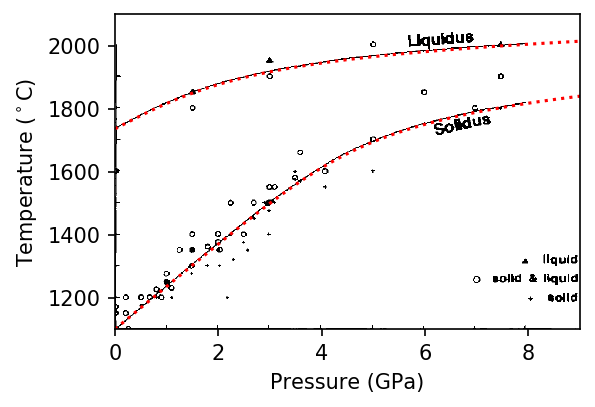

In [3]:
f, a = plt.subplots(figsize=(4.00, 2.78), dpi=150)

pub = plt.imread('figures/mckenzie_fig5.png')

a.set_xlim(0.0, 9.0)
a.set_ylim(1100, 2100)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(P, mckenzie_solidus, c='r', ls=':')
a.plot(P, mckenzie_liquidus, c='r', ls=':')

a.set_ylabel('Temperature ($^\circ$C)')
a.set_xlabel('Pressure (GPa)')

plt.show()

## Figure 6 - rescaled temperature vs melt fraction

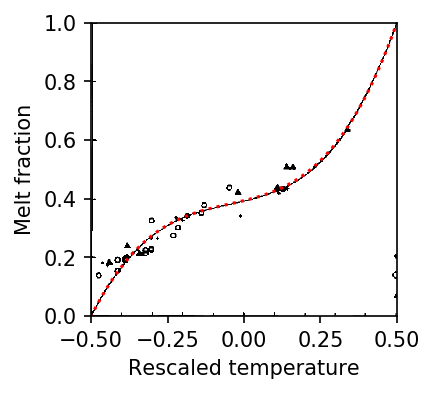

In [4]:
def TRescaled(T, P):
    TRescaled = (T-((mckenzie.TLiquidus(P)+mckenzie.TSolidus(P))*0.5))/(mckenzie.TLiquidus(P)-mckenzie.TSolidus(P))
    return TRescaled

TRescaled_mckenzie = [TRescaled(i,3.0) for i in T]

f, a = plt.subplots(figsize=(2.63, 2.59), dpi=150)

pub = plt.imread('figures/mckenzie_fig6.png')

a.set_xlim(-0.5, 0.5)
a.set_ylim(0.0, 1.0)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(TRescaled_mckenzie, mckenzie_F, c='r',ls=':')

a.set_xlabel('Rescaled temperature')
a.set_ylabel('Melt fraction')

plt.show()


## Figure 7 - adiabatic decompression melting

In [5]:
mckenzie = m.lithologies.mckenzie.lherzolite()

mantle = m.mantle([mckenzie],[1],['Lz'])

tp = [1280, 1330, 1380, 1480, 1580]

columns = []
for i in range(len(tp)):
    columns.append(mantle.adiabaticMelt(tp[i], Pstart=8.0))

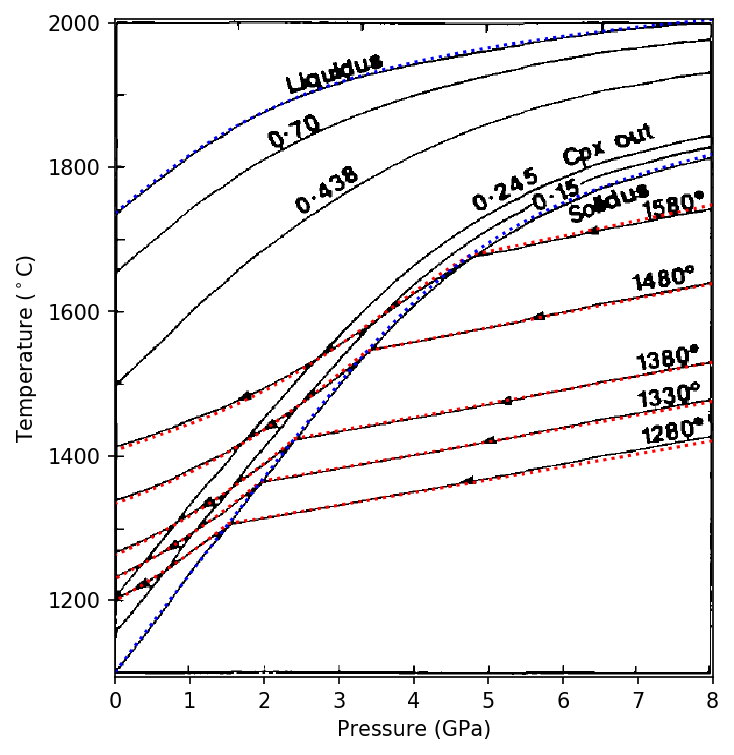

In [6]:
f, a = plt.subplots(figsize=(5.14, 5.81), dpi=150)
pub = plt.imread('figures/mckenzie_fig7a.png')

a.set_xlim(0.0, 8.0)
a.set_ylim(1093, 2005)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

for i in range(len(tp)):
    a.plot(columns[i].P, columns[i].T, c='r', ls=':')

a.plot(P, mckenzie_solidus, c='b', ls=':')
a.plot(P, mckenzie_liquidus, c='b', ls=':')

a.set_xlabel('Pressure (GPa)')
a.set_ylabel('Temperature ($^\circ$C)')

plt.show()    
